# S05 T01: Tasca mètodes de mostreig

Descripció
Aprèn a realitzar mostreig de les dades amb Python.

## NIVELL 1
###  Exercici 1
Agafa un conjunt de dades de tema esportiu que t'agradi. Realitza un mostreig de les dades generant una mostra aleatòria simple i una mostra sistemàtica.



He escollit un conjunt de dades relacionades amb el mundial del futbol femení del 2019 que he trobat al web https://data.world/, on es veuen les jugadores de cada equip i diversa informació de cada una

In [1]:
# Crido a les llibreries que necessito
# Faig entrar l'arxiu CSV gràcies a pandas

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn

women = pd.read_csv("C:\\Users\\Anna\DataScience\\SPRINTS\\SPRINT 5\\Womens Squads.csv", encoding = "ISO-8859-1", engine='python', sep=";")

display(women)

,Squad no.,Country,Pos.,Player,DOB,Age,Caps,Goals,Club
0,1,US,GK,Alyssa Naeher,20-abr-88,31,43.0,0.0,Chicago Red Stars
1,2,US,FW,Mallory Pugh,29-abr-98,21,50.0,15.0,Washington Spirit
2,3,US,MF,Sam Mewis,09-oct-92,26,47.0,9.0,North Carolina Courage
3,4,US,DF,Becky Sauerbrunn,06-jun-85,34,155.0,0.0,Utah Royals
4,5,US,DF,Kelley O'Hara,04-ago-88,30,115.0,2.0,Utah Royals
...,...,...,...,...,...,...,...,...,...
547,19,France,DF,Griedge Mbock Bathy,26-feb-95,24,49.0,4.0,Lyon
548,20,France,FW,Delphine Cascarino,05-feb-97,22,11.0,1.0,Lyon
549,21,France,GK,Pauline Peyraud-Magnin,17-mar-92,27,1.0,0.0,Arsenal
550,22,France,DF,Julie Debever,18-abr-88,31,2.0,0.0,Guingamp


In [2]:
# Tipus de dades que trobem a cada columna
women.dtypes

Squad no.      int64
Country       object
Pos.          object
Player        object
DOB           object
Age            int64
Caps         float64
Goals        float64
Club          object
dtype: object

In [3]:
# Petita descripció de cada columna
women.describe()

,Squad no.,Age,Caps,Goals
count,552.000000,552.000000,520.000000,520.000000
mean,12.000000,26.050725,43.661538,7.348077
std,6.639266,4.060920,43.674846,15.541727
min,1.000000,16.000000,0.000000,0.000000
25%,6.000000,23.000000,11.750000,0.000000
50%,12.000000,26.000000,29.500000,1.500000
75%,18.000000,29.000000,62.000000,8.250000
max,23.000000,41.000000,282.000000,181.000000


 MOSTRA ALEATÒRIA SIMPLE
 
 Utilitzo el mètode "sample" i em treu una mostra aleatòria simple de 100 jugadores.
 
 La mostra aleatòria simple es caracteritza perquè tots els membres de la població tenen les mateixes possibilitats de ser seleccionats.

In [4]:
mostra_simple = women.sample(100)

display(mostra_simple)

,Squad no.,Country,Pos.,Player,DOB,Age,Caps,Goals,Club
511,6,Nigeria,MF,Evelyn Nwabuoku,14-nov-85,33,42.0,3.0,Rivers Angels
17,18,US,GK,Ashlyn Harris,19-oct-85,33,21.0,0.0,Orlando Pride
76,8,Chile,MF,Karen Araya,16-oct-90,28,20.0,6.0,Sevilla
291,16,Jamaica,DF,Dominique Bond-Flasza,11-sep-96,22,16.0,2.0,PSV
537,9,France,FW,Eugénie Le Sommer,18-may-89,30,159.0,73.0,Lyon
...,...,...,...,...,...,...,...,...,...
311,13,Italy,DF,Elisa Bartoli,07-may-91,28,45.0,1.0,Roma
62,17,Sweden,MF,Caroline Seger,19-mar-85,34,193.0,27.0,Rosengård
205,22,Scotland,FW,Erin Cuthbert,19-jul-98,20,29.0,9.0,Chelsea
262,10,Argentina,MF,Estefanía Banini,21-jun-90,28,32.0,9.0,Levante


MOSTRA ALEATÒRIA SISTEMÀTICA

És similar a la simple però en comptes de generar números aleatoris, els individus s’escullen a intervals regulars a partir d'un primer número aleatori.

La fòrmula és k = N\n, on K serà l'interval, N majúscula és la mida total de la població i n minúscula és la mida de la mostra


In [5]:
# Definim la mida de la mostra
print(women.shape)

n = 100              # mida de la mostra que volem 
N = len(women)       # mida de la població
k = int(N/n)         # càlcul de l'interval 

print("L'interval per fer el càlcul de la mostra serà de ", k)


(552, 9)
L'interval per fer el càlcul de la mostra serà de  5


In [6]:
# Eleció del número aleatori
# Tot aquest apartat m'ha quedat inutilitzat pel problema que m'he trobat i que explico en el següent punt

randomNum = random.randint(1,552)

print("El número des d'on s'iniciarà l'elecció dels valors de la mostra és el", randomNum)

El número des d'on s'iniciarà l'elecció dels valors de la mostra és el 459


In [7]:
# Definim la funció de la mostra aleatòria sistemàtica

def systematic (women, step):
    index = np.arange(k, len(women), step=step)
    mostra_sistematica = women.iloc[index]
    return mostra_sistematica
 
# Obtenim el restultat de la funció amb els valors que volem

mostra_sistematica = systematic(women, k)

display(mostra_sistematica)
print(mostra_sistematica.shape)

# La mostra surt de 110 en comptes de 100 perquè he convertit la k en int, per tant al arrodonir tants valors al final em surt una mostra un xic més gran


# He intentat fer que el primer número fos random, però al arribar al final del dataframe se'm parava el recompte i no tornava al principi, llavors he decidit començar el recompte amb el propi valor de "k". La formula que intentava aplicar és la següent
# index = np.arange(randomNum, len(women), step=step)

,Squad no.,Country,Pos.,Player,DOB,Age,Caps,Goals,Club
5,6,US,MF,Morgan Brian,26-feb-93,26,82.0,6.0,Chicago Red Stars
10,11,US,DF,Ali Krieger,28-jul-84,34,99.0,1.0,Orlando Pride
15,16,US,MF,Rose Lavelle,14-may-95,24,24.0,6.0,Washington Spirit
20,21,US,GK,Adrianna Franch,12-nov-90,28,1.0,0.0,Portland Thorns
25,3,Thailand,DF,Natthakarn Chinwong,15-mar-92,27,11.0,0.0,Bundit Asia
...,...,...,...,...,...,...,...,...,...
530,2,France,DF,Ève Périsset,24-dic-94,24,13.0,0.0,Paris Saint-Germain
535,7,France,DF,Sakina Karchaoui,26-ene-96,23,23.0,0.0,Montpellier
540,12,France,FW,Emelyne Laurent,04-nov-98,20,3.0,0.0,Guingamp
545,17,France,MF,Gaëtane Thiney,28-oct-85,33,154.0,58.0,Paris FC


(110, 9)


## NIVELL 2
### Exercici 2
Continua amb el conjunt de dades de tema esportiu i genera una mostra estratificada i una mostra utilitzant SMOTE (Synthetic Minority Oversampling Technique).




MOSTRA ESTRATIFICADA

Consisteix en dividir la població en subpoblacions que poden diferir de manera important.  Permet extreure conclusions més precises assegurant que cada subgrup (o estrat) està representat correctament a la mostra.
Per utilitzar-lo s’ha de dividir la població en subgrups, calcular quantes persones s’haurien de prendre mostres de cada subgrup i utilitzar el mostreig aleatori o sistemàtic per seleccionar la mostra de cada subgrup



In [8]:
pd.set_option('max_rows', None)            #ho modificio per veure tota la mostra

# Primer decideixo com vull dividir la població, i en aquest cas ho faig per país de procedència, per tant, necessito saber quants països hi ha per saber quants strats m'hauran de sortir i quina mostra agafaré de cada estrat

def mostra_estratificada(women,n,numClusters):           # funció princiapl
    N = len(women)
    k = int(N/n)
    numGrups = int(N/k)
    
    def pes_subgrups (women, numGrups):                  # funció per saber quants valors tindrà cada estrat
       
        def mostra_subgrup (x):                          # funció per l'elecció de la població de cada estrat
            n_x = int(np.rint(k*len(x)/len(women)))
            mostra_x = x.sample(n_x)
            return(mostra_x)
       
        pes_mostra = women.groupby("Country").apply(mostra_subgrup)
        return(pes_mostra)
   
    estrats = None
    for k in range (numGrups):               #bucle for perquè vagi recorrent i trobant cada cluster amb les mostres
        pes_mostra_k = pes_subgrups(women,k).reset_index(drop = True)
        pes_mostra_k["cluster"] = np.repeat(k, len(pes_mostra_k))
        estrats = pd.concat([estrats, pes_mostra_k], axis=0)
        women.drop(index = pes_mostra_k.index)
    clusters_seleccionats = np.random.randint(k,numGrups,size= numClusters)
    mostres_estratificades = estrats[estrats.cluster.isin(clusters_seleccionats)]
    return (mostres_estratificades)

mostra = mostra_estratificada(women = women,n=100,numClusters=20)
display(mostra)

#Com que totes els equips tenen el mateix número de jugadores, els clústers tenen tots el mateix tamany
    

,Squad no.,Country,Pos.,Player,DOB,Age,Caps,Goals,Club,cluster
0,10,Argentina,MF,Estefanía Banini,21-jun-90,28,32.0,9.0,Levante,109
1,15,Argentina,FW,Belén Potassa,12-dic-88,30,28.0,7.0,UAI Urquiza,109
2,6,Argentina,DF,Aldana Cometti,03-mar-96,23,32.0,3.0,Sevilla,109
3,16,Argentina,MF,Lorena Benítez,03-dic-98,20,2.0,0.0,Boca Juniors,109
4,21,Argentina,DF,Natalie Juncos,28-dic-90,28,6.0,0.0,Unattached,109
5,3,Australia,MF,Aivi Luik,18-mar-85,34,21.0,0.0,Levante,109
6,6,Australia,MF,Chloe Logarzo,22-dic-94,24,37.0,6.0,Washington Spirit,109
7,14,Australia,DF,Alanna Kennedy,21-ene-95,24,77.0,7.0,Orlando Pride,109
8,15,Australia,FW,Emily Gielnik,13-may-92,27,28.0,7.0,Melbourne Victory,109
9,22,Australia,MF,Amy Harrison,21-abr-96,23,10.0,0.0,Washington Spirit,109


MOSTRA UTILITZANT SMOTE (Synthetic Minority Oversampling Technique).

Tècnica de mostreig que ens permet generar mostres sintètiques per a les categories minoritàries d'un grup

Per veure si tenim alguna classe minoritària, farem una mica d'estudi bàsic de les dades per tenir una idea del que ens podem trobar

In [9]:
women.describe()

,Squad no.,Age,Caps,Goals
count,552.000000,552.000000,520.000000,520.000000
mean,12.000000,26.050725,43.661538,7.348077
std,6.639266,4.060920,43.674846,15.541727
min,1.000000,16.000000,0.000000,0.000000
25%,6.000000,23.000000,11.750000,0.000000
50%,12.000000,26.000000,29.500000,1.500000
75%,18.000000,29.000000,62.000000,8.250000
max,23.000000,41.000000,282.000000,181.000000


In [10]:
women.count()

Squad no.    552
Country      552
Pos.         552
Player       552
DOB          552
Age          552
Caps         520
Goals        520
Club         552
dtype: int64

In [11]:
# Com que en l'anterior punt veiem que les columnes "Caps" i "Goals" tenen menys quantitat de dades que la resta de columnes, em fa sospitar que hi ha nuls en aquest dataset, per tant ho comprovo

print(women.isnull())

print("____________________________________________________________________________")

print(women.count())

print("____________________________________________________________________________")

print(women.isnull().sum())


     Squad no.  Country   Pos.  Player    DOB    Age   Caps  Goals   Club
0        False    False  False   False  False  False  False  False  False
1        False    False  False   False  False  False  False  False  False
2        False    False  False   False  False  False  False  False  False
3        False    False  False   False  False  False  False  False  False
4        False    False  False   False  False  False  False  False  False
5        False    False  False   False  False  False  False  False  False
6        False    False  False   False  False  False  False  False  False
7        False    False  False   False  False  False  False  False  False
8        False    False  False   False  False  False  False  False  False
9        False    False  False   False  False  False  False  False  False
10       False    False  False   False  False  False  False  False  False
11       False    False  False   False  False  False  False  False  False
12       False    False  False   False

limit_output extension: Maximum message size of 10000 exceeded with 41399 characters

In [12]:
# Eliminem les files que contenen algun valor nul i comprobem que s'han eliminat, de manera que totes les files tenen la mateixa mida ara.

women = women.dropna(subset=["Caps", "Goals"])

women.count()

Squad no.    520
Country      520
Pos.         520
Player       520
DOB          520
Age          520
Caps         520
Goals        520
Club         520
dtype: int64

In [13]:
women.columns

Index(['Squad no.', 'Country', 'Pos.', 'Player', 'DOB', 'Age', 'Caps', 'Goals',
       'Club'],
      dtype='object')

In [14]:
# Utilitzo la fòrmula següent per tenir una idea de si tinc alguna categoria minoritària al meu dataset

numSamarreta = pd.value_counts(women['Squad no.'], sort = True)

display(numSamarreta)

12    24
17    24
4     24
5     24
8     24
9     24
10    24
3     23
6     23
7     23
20    23
18    23
22    22
1     22
13    22
2     22
11    22
23    22
15    21
16    21
14    21
19    21
21    21
Name: Squad no., dtype: int64

In [15]:
pais = pd.value_counts(women['Country'], sort = True)

display(pais)

US              23
Argentina       23
Norway          23
South Korea     23
Germany         23
South Africa    23
Spain           23
Australia       23
Brazil          23
Italy           23
Jamaica         23
England         23
Japan           23
Scotland        23
Canada          23
Netherlands     23
New Zealand     23
Chile           23
Sweden          23
France          23
Thailand        17
Cameroon        15
China PR        14
Nigeria         14
Name: Country, dtype: int64

In [16]:
posicio = pd.value_counts(women['Pos.'], sort = True)

display(posicio)

DF    166
MF    156
FW    132
GK     66
Name: Pos., dtype: int64

In [17]:
edat = pd.value_counts(women['Age'], sort = True)

display(edat)

26    59
25    52
28    49
27    47
24    44
23    37
29    33
22    30
31    30
30    30
21    26
20    17
33    15
32    10
34    10
18     8
19     7
17     5
35     4
36     3
37     1
41     1
16     1
39     1
Name: Age, dtype: int64

In [18]:
partitsJugats = pd.value_counts(women['Caps'], sort = True)

display(partitsJugats)

3.0      18
20.0     17
2.0      15
6.0      13
0.0      12
4.0      12
13.0     12
1.0      11
8.0      11
45.0     10
21.0     10
14.0      9
7.0       9
12.0      9
11.0      8
40.0      8
9.0       8
26.0      8
16.0      8
18.0      7
34.0      7
5.0       7
43.0      7
19.0      7
31.0      7
24.0      7
22.0      6
35.0      6
37.0      6
42.0      6
17.0      6
10.0      6
61.0      6
62.0      5
28.0      5
15.0      5
77.0      5
71.0      5
50.0      5
48.0      4
30.0      4
123.0     4
59.0      4
49.0      4
66.0      4
29.0      4
25.0      4
32.0      4
23.0      4
95.0      3
36.0      3
58.0      3
63.0      3
104.0     3
74.0      3
60.0      3
69.0      3
39.0      3
64.0      3
76.0      3
65.0      3
108.0     3
38.0      3
52.0      3
57.0      3
99.0      3
46.0      3
87.0      3
44.0      3
115.0     3
96.0      2
47.0      2
80.0      2
79.0      2
160.0     2
85.0      2
53.0      2
147.0     2
83.0      2
135.0     2
27.0      2
56.0      2
113.0     2
139.

In [19]:
gols = pd.value_counts(women['Goals'], sort = True)

display(gols)

0.0      202
1.0       58
3.0       31
2.0       28
6.0       17
5.0       17
9.0       14
8.0       14
7.0       12
10.0      11
4.0       11
11.0       9
17.0       9
12.0       7
14.0       6
13.0       5
16.0       5
15.0       5
25.0       4
20.0       4
22.0       4
27.0       3
18.0       3
28.0       3
19.0       3
24.0       3
23.0       3
32.0       3
58.0       2
29.0       2
57.0       2
47.0       2
30.0       2
110.0      1
21.0       1
54.0       1
45.0       1
61.0       1
31.0       1
83.0       1
33.0       1
42.0       1
44.0       1
53.0       1
101.0      1
49.0       1
107.0      1
181.0      1
73.0       1
Name: Goals, dtype: int64

In [20]:
club = pd.value_counts(women['Club'], sort = True)

display(club)

Barcelona                           15
Lyon                                14
Manchester City                     12
Chelsea                             12
Unattached                          11
Incheon Hyundai Steel Red Angels    11
Nippon TV Beleza                    10
Bayern Munich                       10
Arsenal                              9
Portland Thorns                      9
Paris Saint-Germain                  9
LSK Kvinner                          8
Juventus                             8
Reign FC                             8
Orlando Pride                        8
Atlético Madrid                      8
North Carolina Courage               7
Milan                                7
Houston Dash                         7
VfL Wolfsburg                        7
Bundit Asia                          7
Montpellier                          7
Kopparbergs/Göteborg                 6
UAI Urquiza                          6
INAC Kobe Leonessa                   6
Utah Royals              

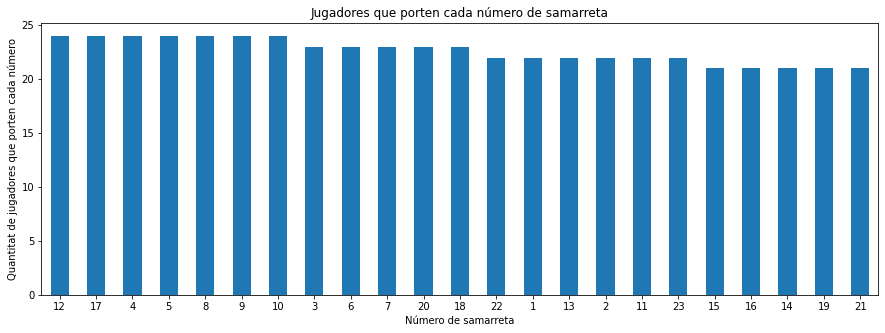

In [21]:
# I per fer els resultats anteriors més visuals els converteixo en gràfics
plt.figure(figsize=(15,5))

numSamarreta.plot(kind = "bar", rot=0)

plt.title("Jugadores que porten cada número de samarreta")
plt.xlabel("Número de samarreta")
plt.ylabel("Quantitat de jugadores que porten cada número");

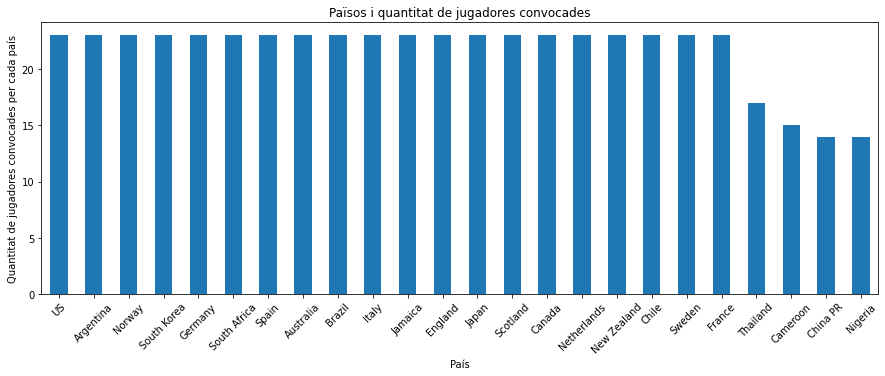

In [22]:
plt.figure(figsize=(15,5))

pais.plot(kind = "bar", rot=0)

plt.xticks(rotation=45)
plt.title("Països i quantitat de jugadores convocades")
plt.xlabel("País")
plt.ylabel("Quantitat de jugadores convocades per cada país");

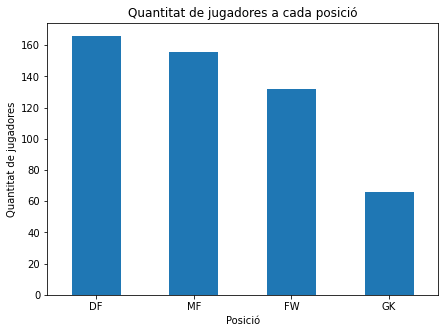

In [23]:
plt.figure(figsize=(7,5))

posicio.plot(kind = "bar", rot=0)

plt.title("Quantitat de jugadores a cada posició")
plt.xlabel("Posició")
plt.ylabel("Quantitat de jugadores");

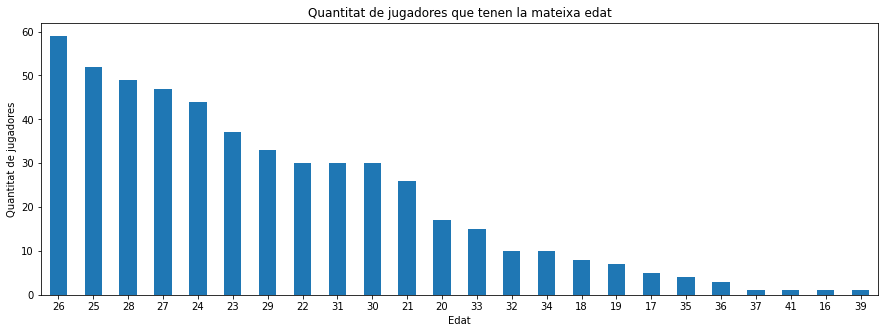

In [24]:
plt.figure(figsize=(15,5))

edat.plot(kind = "bar", rot=0)

plt.title("Quantitat de jugadores que tenen la mateixa edat")
plt.xlabel("Edat")
plt.ylabel("Quantitat de jugadores");

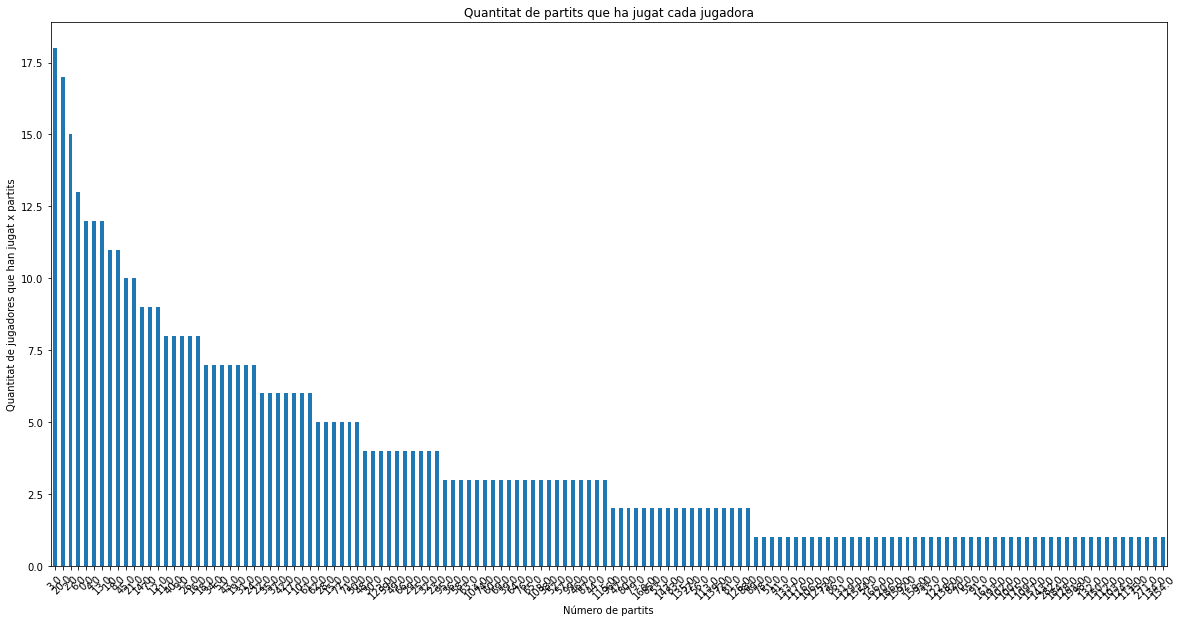

In [25]:
plt.figure(figsize=(20,10))

partitsJugats.plot(kind = "bar", rot=0)

plt.xticks(rotation=45)
plt.title("Quantitat de partits que ha jugat cada jugadora")
plt.xlabel("Número de partits")
plt.ylabel("Quantitat de jugadores que han jugat x partits");

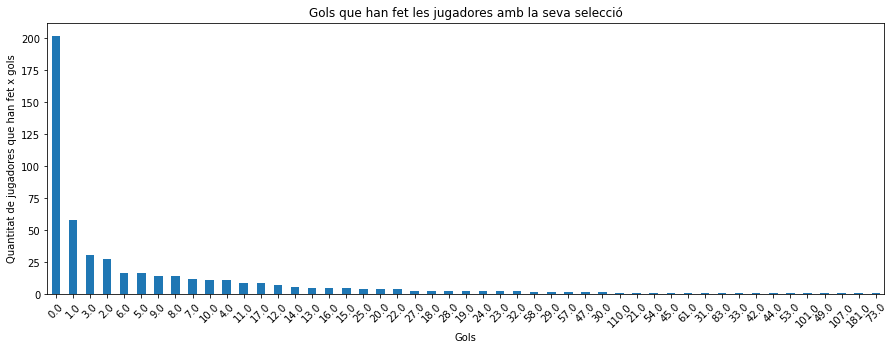

In [26]:
plt.figure(figsize=(15,5))

gols.plot(kind = "bar", rot=0)

plt.xticks(rotation=45)
plt.title("Gols que han fet les jugadores amb la seva selecció")
plt.xlabel("Gols")
plt.ylabel("Quantitat de jugadores que han fet x gols");

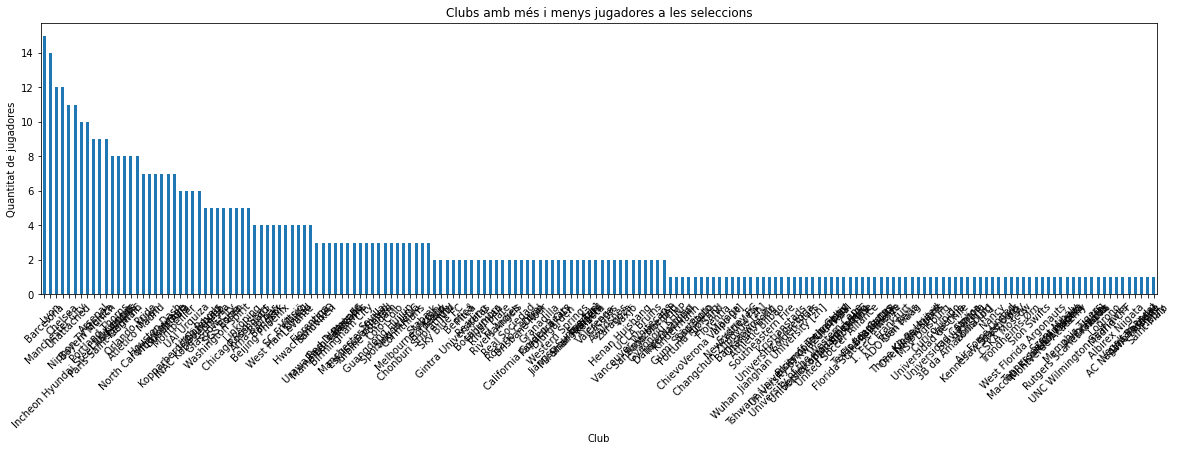

In [27]:
plt.figure(figsize=(20,5))

club.plot(kind = "bar", rot=0)

plt.xticks(rotation=45)
plt.title("Clubs amb més i menys jugadores a les seleccions")
plt.xlabel("Club")
plt.ylabel("Quantitat de jugadores");

Ara divideixo el dataset original en dos, un que serà el df amb les variables explicatives (x) i l'altre amb la variable objectiu (Y)

In [28]:
# Ho he provat tot i no hi ha manera d'aconseguir que em fucioni, l'error clau és el següent i no li he sapigut trobar solució
#   ValueError: could not convert string to float: 'US'

'''
from imblearn.over_sampling import SMOTE

X = women[["Squad no.", "Country", "Pos.", 'Player', "DOB", "Age", "Caps", "Club"]]
y = women["Goals"]

sm = SMOTE()
X_res, y_res = sm.fit_resample(X,y)

df_over = X_res
df_over["Goals"] = y_res
'''

'\nfrom imblearn.over_sampling import SMOTE\n\nX = women[["Squad no.", "Country", "Pos.", \'Player\', "DOB", "Age", "Caps", "Club"]]\ny = women["Goals"]\n\nsm = SMOTE()\nX_res, y_res = sm.fit_resample(X,y)\n\ndf_over = X_res\ndf_over["Goals"] = y_res\n'


## NIVELL 3
### Exercici 3
Continua amb el conjunt de dades de tema esportiu i genera una mostra utilitzant el mètode Reservoir sampling.

El RESERVOIR SAMPLING s'utilitza en la mineria de dades per obtenir una mostra de mida n a partir d'un flux de dades de longitud desconeguda

In [35]:
# Em surt l'error següent i no sé entendre què vol dir:
# KeyError: 0 

'''
# Preparo les dades
n = len(women)
k = 100

mostra_reservoir = []  #creació de la llista buida on s'hi aniran posant els valors aleatoris que vagin sortint per la mostra

# Inicialització de mostra_reservoir
for i in range (k):
    mostra_reservoir.append(women[i])

# Iteració pel dataset fins a n-1    
for j in range (k,n):
    index = random.randint(0,j)
    if index < k:
        mostra_reservoir[index] = women[j]
print("Input array:")
print(women)
print("Output array:")
print(mostra_reservoir)
'''

'\n# Preparo les dades\nn = len(women)\nk = 100\n\nmostra_reservoir = []  #creació de la llista buida on s\'hi aniran posant els valors aleatoris que vagin sortint per la mostra\n\n# Inicialització de mostra_reservoir\nfor i in range (k):\n    mostra_reservoir.append(women[i])\n\n# Iteració pel dataset fins a n-1    \nfor j in range (k,n):\n    index = random.randint(0,j)\n    if index < k:\n        mostra_reservoir[index] = women[j]\nprint("Input array:")\nprint(women)\nprint("Output array:")\nprint(mostra_reservoir)\n'

In [39]:
# He provat de fer-ho d'una altra manera i em surt el mateix error:
# KeyError: 0 

'''

# Creo funció per imprimir la array
def imprimirArray(women,n):
    for i in range(n):
        print(women[i],end=" ")
    print()

# Creo funció per seleccionar aleatòriament els elements que vull afegir a la mostra 
def seleccioMostra(women, n, k):
    i = 0
    reservoir = [0]*k  # creació i inicialització d'on es guardarà la mostra
    for i in range (k):
        reservoir[i] = women[i]
   
    # iteració per tot el dataset 
    while (i<n):
        j = random.randint(i+1)
        if (j<k):   # si el número aleatòri es més petit que k, s'agafa el corresponent del dataset i s'afegeix a la mostra
            reservoir[j] = women[i]
        i+=1
    print(women, k)
    
# Codi amb la info que necessitem perquè funcioni tot lo anterior    
if __name__ == "__main__":
    women = women;
    n = len(women);
    k = 100;
    seleccioMostra(women, n, k);

'''

'\n\n# Creo funció per imprimir la array\ndef imprimirArray(women,n):\n    for i in range(n):\n        print(women[i],end=" ")\n    print()\n\n# Creo funció per seleccionar aleatòriament els elements que vull afegir a la mostra \ndef seleccioMostra(women, n, k):\n    i = 0\n    reservoir = [0]*k  # creació i inicialització d\'on es guardarà la mostra\n    for i in range (k):\n        reservoir[i] = women[i]\n   \n    # iteració per tot el dataset \n    while (i<n):\n        j = random.randint(i+1)\n        if (j<k):   # si el número aleatòri es més petit que k, s\'agafa el corresponent del dataset i s\'afegeix a la mostra\n            reservoir[j] = women[i]\n        i+=1\n    print(women, k)\n    \n# Codi amb la info que necessitem perquè funcioni tot lo anterior    \nif __name__ == "__main__":\n    women = women;\n    n = len(women);\n    k = 100;\n    seleccioMostra(women, n, k);\n\n'